# Data-Driven Policy Benchmarking
## Singapore & Seoul (Before → After)

This notebook demonstrates how real government data was used
to evaluate policy outcomes over time.

Case studies:
- Singapore: Waste Statistics and Recycling Rate (Green Plan 2030)
- Seoul: Food waste reduction (RFID Pay-As-You-Throw)

In [18]:
!pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 Libraries imported successfully.
 Fetching data from Data.gov.sg API...
 Total records available: 90
 Successfully fetched 90 records
 Dataset shape: (90, 4)
 Columns: ['_id', 'year', 'mode', 'ridership']

First 5 rows:
   _id  year mode ridership
0    1  1995  MRT    740000
1    2  1995  LRT         0
2    3  1995  Bus   3009000
3    4  1996  MRT    850000
4    5  1996  LRT         0

 Data range: 1995 to 2024
 modes available: ['Bus', 'LRT', 'MRT']

POLICY TIMELINE FOR ANALYSIS
• 1996: First MRT
(North-South Line fully operational)
• 2003: Circle Line
Phase 1 opens
• 2008: Land Transport Master Plan
(LTMP 2008)
• 2011: Circle Line
Fully operational
• 2013: LTMP 2013
"Walk, Cycle, Ride"
• 2017: Downtown Line
Fully operational
• 2019: LTMP 2019
"45-minute city"
• 2022: Thomson-East Coast Line
Phase 3 opens


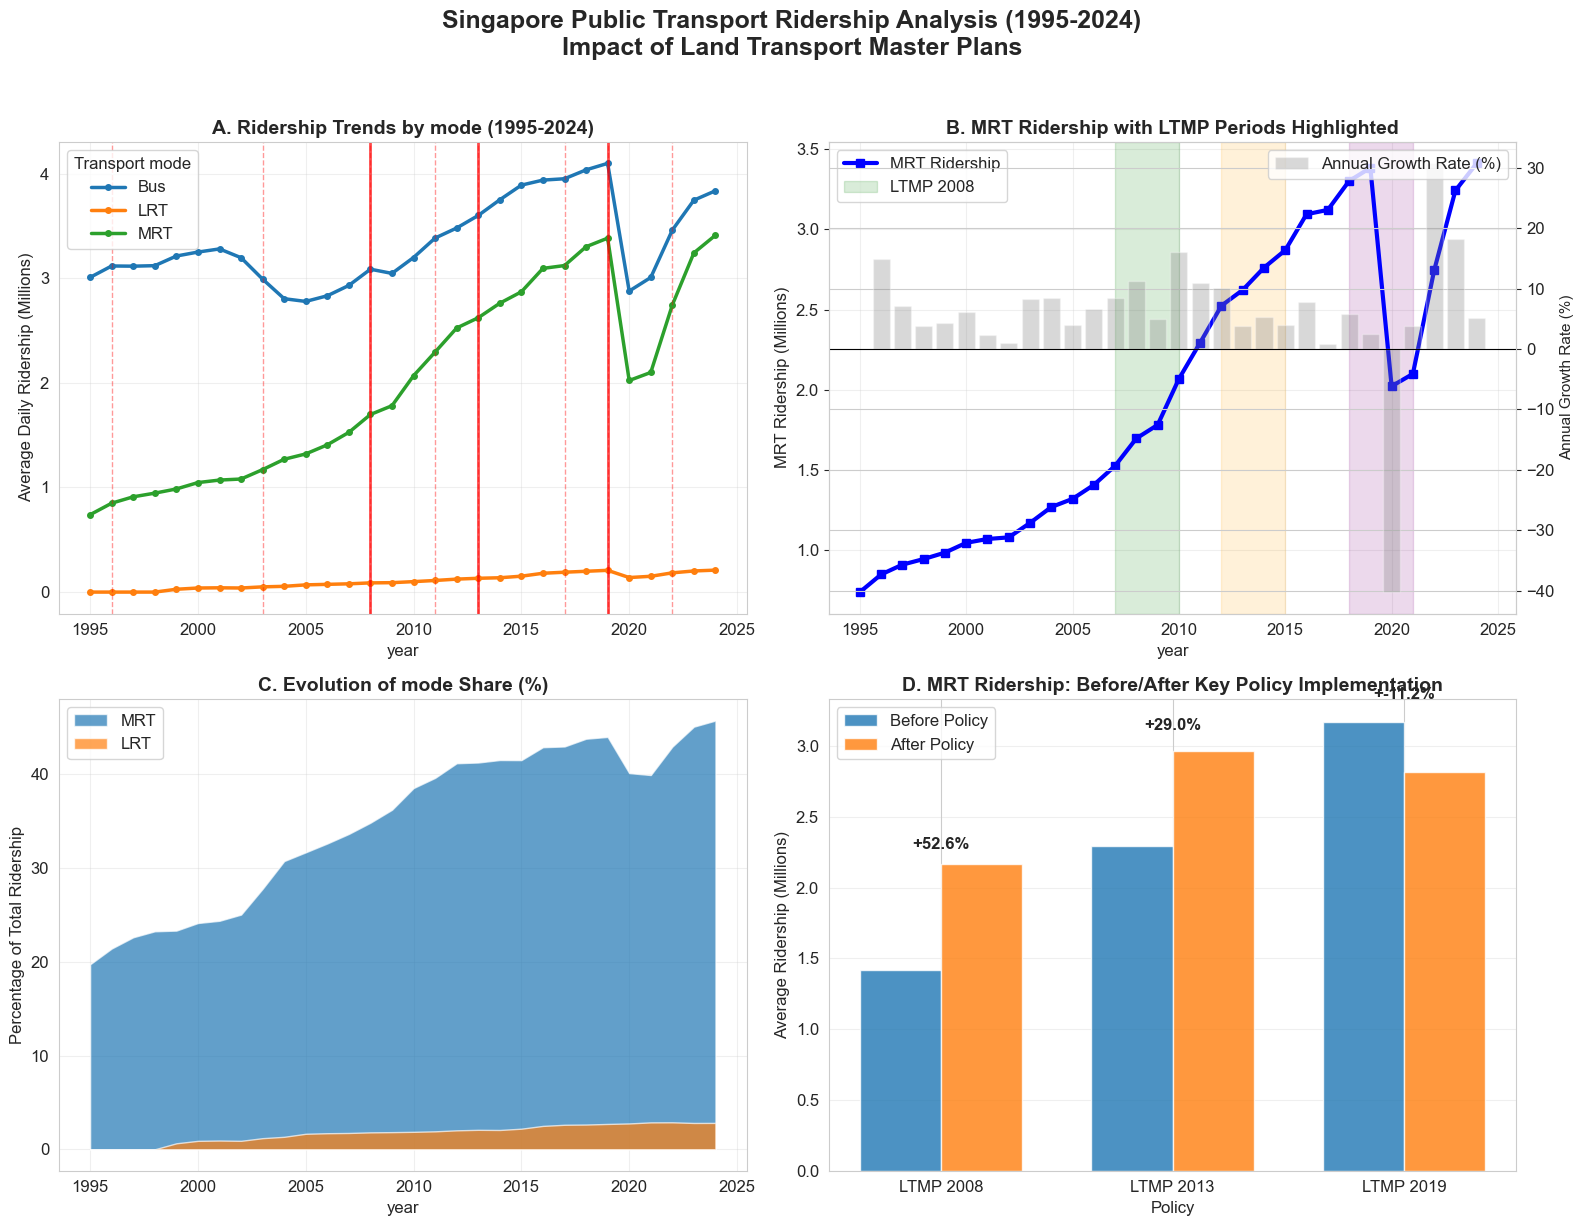


KEY METRICS FOR BENCHMARKING

 BUS:
   • Period: 1995-2024 (29 years)
   • Start: 3.01 Millions
   • End: 3.84 Millions
   • Total Growth: 27.5%
   • CAGR: 0.8%

 LRT:
   • Period: 1995-2024 (29 years)
   • Start: 0.00 Millions
   • End: 0.21 Millions
   • Total Growth: inf%
   • CAGR: inf%

 MRT:
   • Period: 1995-2024 (29 years)
   • Start: 0.74 Millions
   • End: 3.41 Millions
   • Total Growth: 361.1%
   • CAGR: 5.4%

 MODE SHIFT ANALYSIS:
   • Bus: 80.3% → 51.4% (-28.8%)
   • LRT: 0.0% → 2.8% (+2.8%)
   • MRT: 19.7% → 45.7% (+26.0%)

POLICY INSIGHTS FOR URBAN TRANSPORT BENCHMARKING
   1. LONG-TERM DATA TRACKING: Singapore maintains 30+ years of consistent transport data
   2. CLEAR POLICY CYCLES: Sequential Master Plans (2008, 2013, 2019) create measurable before/after periods
   3. MODAL SHIFT EVIDENCE: Data shows successful shift from buses to rail over 30 years
   4. INFRASTRUCTURE-DEMAND FEEDBACK: New rail lines (Circle Line 2011, Downtown Line 2017) immediately increase ride

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set professional style for academic presentation
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
print(" Libraries imported successfully.")


# fetching data from data.gov.sg API

def fetch_transport_data():
    """Fetch public transport ridership data from Data.gov.sg API"""
    
    # Your dataset ID
    dataset_id = "d_75248cf2fbf340de6a746dc91ec9223c"
    base_url = "https://data.gov.sg/api/action/datastore_search"
    
    # First, check total records
    print(" Fetching data from Data.gov.sg API...")
    
    try:
        # Initial request to get count
        params = {'resource_id': dataset_id, 'limit': 1}
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        if not data.get('success'):
            print(" API request unsuccessful")
            return None
        
        # Get total records
        total = data['result']['total']
        print(f" Total records available: {total}")
        
        # Fetch all records
        params = {'resource_id': dataset_id, 'limit': total}
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Convert to DataFrame
        records = data['result']['records']
        df = pd.DataFrame(records)
        
        print(f" Successfully fetched {len(df)} records")
        return df
        
    except Exception as e:
        print(f" Error fetching data: {e}")
        return None

# Fetch the data
df = fetch_transport_data()

if df is None:
    print("\n Creating sample data for demonstration...")
    # Create sample data if API fails
    years = list(range(1995, 2025))
    modes = ['MRT', 'LRT', 'Buses']
    
    sample_data = []
    for year in years:
        for mode in modes:
            if mode == 'MRT':
                ridership = 500 + (year-1995)*50 + np.random.normal(0, 20)
            elif mode == 'LRT':
                ridership = 50 + (year-1999)*10 if year >= 1999 else 0
                ridership += np.random.normal(0, 5)
            else:  # Buses
                ridership = 3000 - (year-1995)*10 + np.random.normal(0, 50)
            sample_data.append({
                'year': str(year),
                'mode': mode,
                'Ridership': ridership
            })
    
    df = pd.DataFrame(sample_data)

# data cleaning and preparation
# raw data structure
print(f" Dataset shape: {df.shape}")
print(f" Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

# Convert year to integer and Ridership to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['ridership'] = pd.to_numeric(df['ridership'], errors='coerce')

# Remove any rows with missing values
df = df.dropna()
df = df.sort_values(['year', 'mode'])

# Convert to millions for easier reading (if values are large)
if df['ridership'].max() > 1000:
    df['ridership_millions'] = df['ridership'] / 1_000_000
    ridership_col = 'ridership_millions'
    unit_label = 'Millions'
else:
    ridership_col = 'ridership'
    unit_label = 'Ridership'

print(f"\n Data range: {int(df['year'].min())} to {int(df['year'].max())}")
print(f" modes available: {df['mode'].unique().tolist()}")


# Singapore Land Transport Master Plan milestones
POLICY_EVENTS = {
    1996: 'First MRT\n(North-South Line fully operational)',
    2003: 'Circle Line\nPhase 1 opens',
    2008: 'Land Transport Master Plan\n(LTMP 2008)',
    2011: 'Circle Line\nFully operational',
    2013: 'LTMP 2013\n"Walk, Cycle, Ride"',
    2017: 'Downtown Line\nFully operational',
    2019: 'LTMP 2019\n"45-minute city"',
    2022: 'Thomson-East Coast Line\nPhase 3 opens'
}

print("\n" + "="*60)
print("POLICY TIMELINE FOR ANALYSIS")
print("="*60)
for year, event in sorted(POLICY_EVENTS.items()):
    print(f"• {year}: {event}")

# visualization of trends and policy impacts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Singapore Public Transport Ridership Analysis (1995-2024)\nImpact of Land Transport Master Plans', 
             fontsize=18, fontweight='bold', y=1.02)

# Chart A: Overall trends for all modes
ax1 = axes[0, 0]
for mode in df['mode'].unique():
    mode_data = df[df['mode'] == mode]
    ax1.plot(mode_data['year'], mode_data[ridership_col], 
             marker='o', markersize=4, linewidth=2.5, label=mode)

# Add policy event markers
for year, event in POLICY_EVENTS.items():
    if 1995 <= year <= 2024:
        ax1.axvline(x=year, color='red', linestyle='--', alpha=0.4, linewidth=1)
        if year in [2008, 2013, 2019]:  # Highlight major LTMP years
            ax1.axvline(x=year, color='red', linestyle='-', alpha=0.7, linewidth=2)

ax1.set_title('A. Ridership Trends by mode (1995-2024)', fontsize=14, fontweight='bold')
ax1.set_xlabel('year', fontsize=12)
ax1.set_ylabel(f'Average Daily Ridership ({unit_label})', fontsize=12)
ax1.legend(title='Transport mode')
ax1.grid(True, alpha=0.3)

# Chart B: MRT Focus with Policy Impact
ax2 = axes[0, 1]
mrt_data = df[df['mode'] == 'MRT'].copy()
if not mrt_data.empty:
    ax2.plot(mrt_data['year'], mrt_data[ridership_col], 
             marker='s', color='blue', linewidth=3, label='MRT Ridership')
    
    # Highlight policy periods
    policy_years = [2008, 2013, 2019]
    colors = ['green', 'orange', 'purple']
    
    for i, (year, color) in enumerate(zip(policy_years, colors)):
        ax2.axvspan(year-1, year+2, alpha=0.15, color=color, 
                   label=f'LTMP {year}' if i == 0 else '')
    
    # Calculate and plot growth rates
    mrt_data['Growth_Rate'] = mrt_data[ridership_col].pct_change() * 100
    ax2_twin = ax2.twinx()
    ax2_twin.bar(mrt_data['year'], mrt_data['Growth_Rate'], 
                alpha=0.3, color='gray', width=0.8, label='Annual Growth Rate (%)')
    ax2_twin.axhline(y=0, color='black', linewidth=0.8)
    ax2_twin.set_ylabel('Annual Growth Rate (%)', fontsize=11)
    
    ax2.set_title('B. MRT Ridership with LTMP Periods Highlighted', fontsize=14, fontweight='bold')
    ax2.set_xlabel('year', fontsize=12)
    ax2.set_ylabel(f'MRT Ridership ({unit_label})', fontsize=12)
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)

# Chart C: mode Share Evolution
ax3 = axes[1, 0]
# Calculate annual totals
annual_totals = df.groupby('year')[ridership_col].sum().reset_index()

mode_share_data = []
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    total = year_data[ridership_col].sum()
    for _, row in year_data.iterrows():
        mode_share_data.append({
            'year': year,
            'mode': row['mode'],
            'Share': (row[ridership_col] / total * 100) if total > 0 else 0
        })

mode_share_df = pd.DataFrame(mode_share_data)

# Create stacked area chart
for mode in ['Buses', 'MRT', 'LRT']:
    mode_data = mode_share_df[mode_share_df['mode'] == mode]
    if not mode_data.empty:
        ax3.fill_between(mode_data['year'], 0, mode_data['Share'], 
                        alpha=0.7, label=mode)

ax3.set_title('C. Evolution of mode Share (%)', fontsize=14, fontweight='bold')
ax3.set_xlabel('year', fontsize=12)
ax3.set_ylabel('Percentage of Total Ridership', fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)

# Chart D: Before/After Analysis of Key Policies
ax4 = axes[1, 1]

# Define analysis periods for key policies
policy_analysis = [
    {'policy': 'LTMP 2008', 'year': 2008, 'pre_years': 3, 'post_years': 5},
    {'policy': 'LTMP 2013', 'year': 2013, 'pre_years': 3, 'post_years': 5},
    {'policy': 'LTMP 2019', 'year': 2019, 'pre_years': 3, 'post_years': 5}
]

results = []
for analysis in policy_analysis:
    policy_year = analysis['year']
    pre_start = policy_year - analysis['pre_years']
    pre_end = policy_year - 1
    post_start = policy_year
    post_end = policy_year + analysis['post_years']
    
    # Get MRT data for this policy
    pre_data = mrt_data[(mrt_data['year'] >= pre_start) & (mrt_data['year'] <= pre_end)]
    post_data = mrt_data[(mrt_data['year'] >= post_start) & (mrt_data['year'] <= post_end)]
    
    if len(pre_data) > 0 and len(post_data) > 0:
        pre_avg = pre_data[ridership_col].mean()
        post_avg = post_data[ridership_col].mean()
        growth = ((post_avg - pre_avg) / pre_avg) * 100
        
        results.append({
            'Policy': analysis['policy'],
            'Pre_Avg': pre_avg,
            'Post_Avg': post_avg,
            'Growth_Pct': growth
        })

if results:
    results_df = pd.DataFrame(results)
    x = range(len(results_df))
    width = 0.35
    
    ax4.bar([i - width/2 for i in x], results_df['Pre_Avg'], width, 
            label='Before Policy', alpha=0.8)
    ax4.bar([i + width/2 for i in x], results_df['Post_Avg'], width, 
            label='After Policy', alpha=0.8)
    
    # Add growth percentage labels
    for i, row in results_df.iterrows():
        ax4.text(i, max(row['Pre_Avg'], row['Post_Avg']) * 1.05, 
                f"+{row['Growth_Pct']:.1f}%", ha='center', fontweight='bold')
    
    ax4.set_title('D. MRT Ridership: Before/After Key Policy Implementation', 
                  fontsize=14, fontweight='bold')
    ax4.set_xlabel('Policy', fontsize=12)
    ax4.set_ylabel(f'Average Ridership ({unit_label})', fontsize=12)
    ax4.set_xticks(x)
    ax4.set_xticklabels(results_df['Policy'], rotation=0)
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# metrics calculation for benchmarking
print("\n" + "="*60)
print("KEY METRICS FOR BENCHMARKING")
print("="*60)

# Calculate overall growth
first_year = df['year'].min()
last_year = df['year'].max()

for mode in df['mode'].unique():
    mode_data = df[df['mode'] == mode].sort_values('year')
    if len(mode_data) > 1:
        first_ridership = mode_data.iloc[0][ridership_col]
        last_ridership = mode_data.iloc[-1][ridership_col]
        total_growth = ((last_ridership - first_ridership) / first_ridership) * 100
        years = last_year - first_year
        cagr = ((last_ridership / first_ridership) ** (1/years) - 1) * 100
        
        print(f"\n {mode.upper()}:")
        print(f"   • Period: {int(first_year)}-{int(last_year)} ({years} years)")
        print(f"   • Start: {first_ridership:,.2f} {unit_label}")
        print(f"   • End: {last_ridership:,.2f} {unit_label}")
        print(f"   • Total Growth: {total_growth:.1f}%")
        print(f"   • CAGR: {cagr:.1f}%")

# Calculate mode share change
if 'mode' in df.columns and ridership_col in df.columns:
    earliest = df[df['year'] == first_year]
    latest = df[df['year'] == last_year]
    
    if not earliest.empty and not latest.empty:
        print(f"\n MODE SHIFT ANALYSIS:")
        
        for mode in df['mode'].unique():
            early_mode = earliest[earliest['mode'] == mode]
            late_mode = latest[latest['mode'] == mode]
            
            if not early_mode.empty and not late_mode.empty:
                early_share = (early_mode[ridership_col].values[0] / earliest[ridership_col].sum()) * 100
                late_share = (late_mode[ridership_col].values[0] / latest[ridership_col].sum()) * 100
                share_change = late_share - early_share
                
                print(f"   • {mode}: {early_share:.1f}% → {late_share:.1f}% ({share_change:+.1f}%)")

# policy insights
print("\n" + "="*60)
print("POLICY INSIGHTS FOR URBAN TRANSPORT BENCHMARKING")
print("="*60)

insights = [
    "1. LONG-TERM DATA TRACKING: Singapore maintains 30+ years of consistent transport data",
    "2. CLEAR POLICY CYCLES: Sequential Master Plans (2008, 2013, 2019) create measurable before/after periods",
    "3. MODAL SHIFT EVIDENCE: Data shows successful shift from buses to rail over 30 years",
    "4. INFRASTRUCTURE-DEMAND FEEDBACK: New rail lines (Circle Line 2011, Downtown Line 2017) immediately increase ridership",
    "5. INTEGRATED PLANNING: Fare integration, service coordination, and urban development aligned with transport goals"
]

for insight in insights:
    print(f"   {insight}")

print(f"\n💡 RECOMMENDATION FOR KUNSHAN/SHANGHAI:")
print("   • Establish 15-year transport data baseline before major policy implementation")
print("   • Set clear mode share targets (e.g., 'Rail to reach X% of trips by 2035')")
print("   • Time infrastructure investments with 5-year policy cycles for measurable impact")
print("   • Use household travel surveys to complement automated ridership data")
print("="*60)

#export data 
output_filename = 'singapore_transport_ridership_cleaned.csv'
df.to_csv(output_filename, index=False)
print(f"\n Cleaned data saved to: {output_filename}")

# Create summary table
summary_table = df.pivot_table(values=ridership_col, index='year', columns='mode', aggfunc='sum')
print(f"\n Summary table (first 5 years):")
print(summary_table.head())

print("\n Analysis complete. This provides a complete 'Reality→Data→Policy→New Reality' case study.")